In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,cohen_kappa_score
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression



In [2]:
df = pd.read_excel('spotify all combined final.xlsx')
df.head()

,track,artist,decade,decade in year,uri,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,60,1960,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,...,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,60,1960,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,...,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,60,1960,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,...,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba SonÃ³,Celia Cruz,60,1960,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,...,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,60,1960,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,...,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [3]:
df.shape

(41106, 21)

### Checking for duplicates


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(41106, 21)

- No duplicates in the data

### Removing the extra decade column from the table

In [6]:
decade = df['decade']


In [7]:
df.drop(['decade'],axis=1,inplace=True)

In [8]:
df.head()

,track,artist,decade in year,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,1960,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,1960,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,1960,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba SonÃ³,Celia Cruz,1960,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,1960,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [9]:
df.shape

(41106, 20)

### Encoding the Decade in year column

- A new table has been created where the decade in year column has been encoded.

In [10]:
df.rename(columns={'decade in year':'decade'},inplace=True)
df.head()

,track,artist,decade,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,1960,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,1960,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,1960,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba SonÃ³,Celia Cruz,1960,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,1960,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [17]:
df_encoded = pd.get_dummies(df,columns=['decade'])
pd.options.display.max_columns = None
df_encoded.head()


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,1,0,0,0,0,0
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,1,0,0,0,0,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,1,0,0,0,0,0
3,Mi Bomba SonÃ³,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,1,0,0,0,0,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,1,0,0,0,0,0


In [18]:
num_var = ['danceability','energy','loudness','speechiness',
     'acousticness','instrumentalness','liveness','valence',
     'tempo','chorus_hit','sections']

df_encoded[['danceability','energy','loudness','speechiness',
     'acousticness','instrumentalness','liveness','valence',
     'tempo','chorus_hit','sections']].skew()

danceability       -0.251762
energy             -0.320168
loudness           -1.415109
speechiness         4.573376
acousticness        0.493360
instrumentalness    1.745277
liveness            2.123818
valence            -0.179745
tempo               0.485278
chorus_hit          2.215338
sections            6.053588
dtype: float64

In [19]:
from sklearn.preprocessing import PowerTransformer
PT =PowerTransformer()
df_encoded_transformed = df_encoded.copy()

df_encoded_transformed[num_var] = PT.fit_transform(df_encoded_transformed[num_var])
df_encoded_transformed[num_var].skew()

danceability       -0.038619
energy             -0.101316
loudness            0.043605
speechiness         0.755875
acousticness        0.135333
instrumentalness    1.228352
liveness            0.315287
valence            -0.091337
tempo               0.007244
chorus_hit          0.180306
sections           -0.016309
dtype: float64

In [21]:
df_encoded_transformed.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,-0.722262,0.097700,3,0.354579,1,-0.453477,0.597627,-0.609472,-1.011529,1.147349,2.018695,173533,3,-0.283840,-0.210042,1,1,0,0,0,0,0
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,-0.281596,-0.362682,3,-0.602319,1,-0.802006,-1.151615,0.772708,0.239532,0.955200,-0.550944,213613,4,0.617623,0.066080,0,1,0,0,0,0,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.640239,0.218185,5,-0.753045,1,-0.569680,1.308888,-0.609385,-0.395364,1.402306,-0.029892,223960,4,-0.015654,0.547460,0,1,0,0,0,0,0
3,Mi Bomba SonÃ³,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.242681,-0.205714,7,-0.530892,0,1.330866,1.065876,-0.175761,-1.315115,1.643863,-0.406326,157907,4,-0.873699,-0.516536,0,1,0,0,0,0,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,-0.186615,0.717638,11,1.688569,0,1.566491,1.326374,-0.592484,0.551451,1.394165,-0.076622,245600,4,-1.119379,0.957208,0,1,0,0,0,0,0


Transforming variables to reduce the skewness

In [22]:
df_encoded_transformed.skew()

danceability       -0.038619
energy             -0.101316
key                 0.011140
loudness            0.043605
mode               -0.838691
speechiness         0.755875
acousticness        0.135333
instrumentalness    1.228352
liveness            0.315287
valence            -0.091337
tempo               0.007244
duration_ms         6.820674
time_signature     -3.552714
chorus_hit          0.180306
sections           -0.016309
target              0.000000
decade_1960         1.422283
decade_1970         1.589399
decade_1980         1.775591
decade_1990         2.145272
decade_2000         2.041397
decade_2010         1.899848
dtype: float64

In [70]:
score_card = pd.DataFrame(columns = ['Model name','Accuracy','F1-Score','Cohen-Kappa'])



In [71]:
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa


## Spliting data using train_test_split

In [73]:
x = df_encoded_transformed.drop(['track','artist','uri','target'],axis=1)
y = df_encoded_transformed['target']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=123,stratify=y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((28774, 21), (12332, 21), (28774,), (12332,))

In [74]:
def plot_confusion_matrix(model):
    ypred = model.predict(xtest)
    
   
    cm = confusion_matrix(ytest, ypred)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    
    plt.xticks(fontsize = 20)

    
    plt.yticks(fontsize = 20)

    
    plt.show()

In [75]:
def plot_roc(model):
    ypredprob = model.predict_proba(xtest)[:,1]
    
   
    fpr, tpr, thresholds = roc_curve(ytest, ypred)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    
    plt.plot([0, 1], [0, 1],'r--')

    
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, ypredprob),4)))

    # plot the grid
    plt.grid(True)

### Model 1
#### Logit with encoded year & scaled values

In [76]:

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
numeric_col = ['danceability', 'energy',  'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'chorus_hit',
       'sections']

xtrain[numeric_col] = SS.fit_transform(xtrain[numeric_col])
xtest[numeric_col] = SS.transform(xtest[numeric_col])


              precision    recall  f1-score   support

           0       0.79      0.68      0.73      6166
           1       0.72      0.82      0.76      6166

    accuracy                           0.75     12332
   macro avg       0.75      0.75      0.75     12332
weighted avg       0.75      0.75      0.75     12332



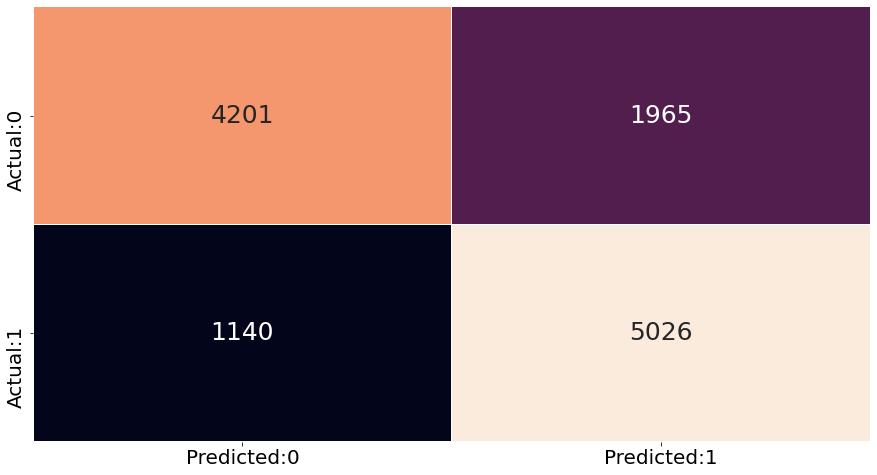

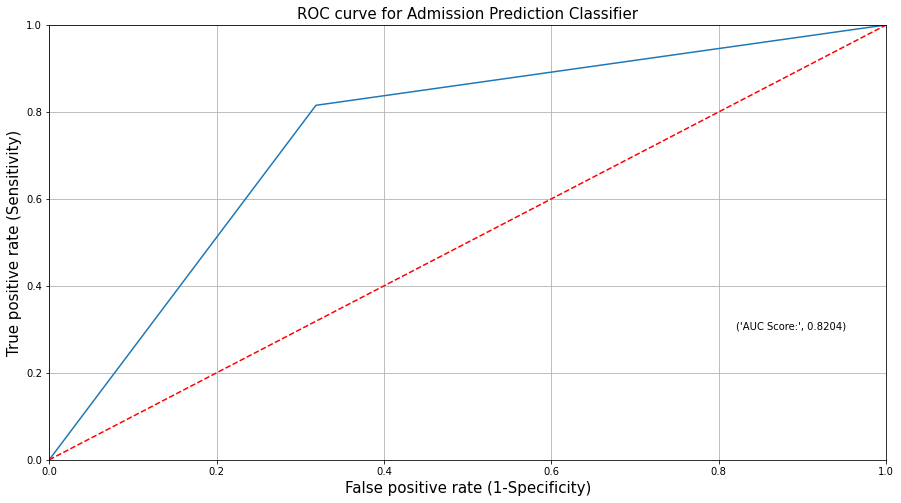

In [77]:
model2 = LR.fit(xtrain,ytrain)

ypred = model2.predict(xtest) 


name = 'Model 1 Logistic Regression (scaled values)'

testreport2 = classification_report(ytest,ypred)

print(testreport2)
plot_confusion_matrix(model2)
plot_roc(model2)

In [78]:
## adding the required metrics of the model to the score card.



tta = accuracy_score(ytest,ypred)
ck =cohen_kappa_score(ytest,ypred)
f1 =f1_score(ytest,ypred)
s = pd.Series({'Model name': name,'Accuracy': np.round(tta,2),'F1-Score': np.round(f1,2),'Cohen-Kappa': np.round(ck,2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Model 1 Logistic Regression (scaled values),0.75,0.76,0.5


In [79]:
df_encoded.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,1,0,0,0,0,0
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,1,0,0,0,0,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,1,0,0,0,0,0
3,Mi Bomba SonÃ³,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,1,0,0,0,0,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,1,0,0,0,0,0


### Model 2
#### Decision Tree 

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6166
           1       0.72      0.72      0.72      6166

    accuracy                           0.72     12332
   macro avg       0.72      0.72      0.72     12332
weighted avg       0.72      0.72      0.72     12332



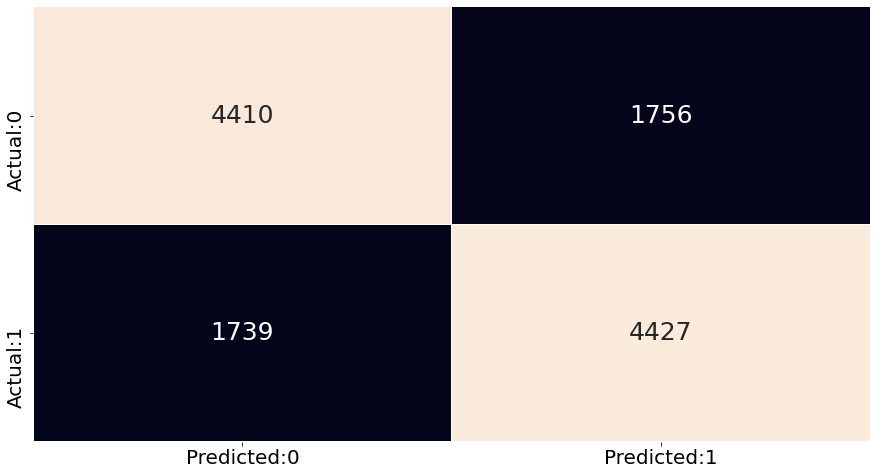

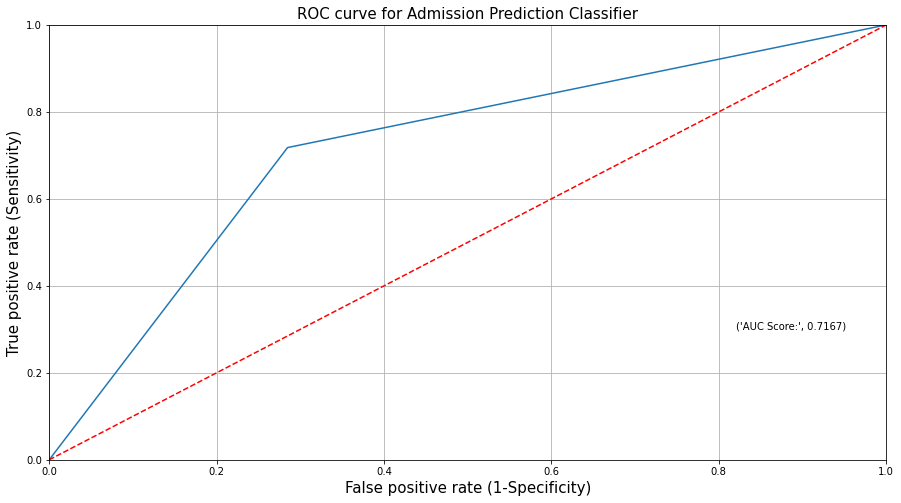

In [80]:
#model 3
# decision tree scled values and encoded year

x = df_encoded.drop(['track','artist','uri','target'],axis=1)
y = df_encoded['target']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=123,stratify=y)


dt = DecisionTreeClassifier(random_state=123)
model3 = dt.fit(xtrain,ytrain)

ypred = model3.predict(xtest)

name = 'Model 2 Decision tree'


testreport3 = classification_report(ytest,ypred)

print(testreport3)
plot_confusion_matrix(model3)
plot_roc(model3)

In [81]:
## adding the required metrics of the model to the score card.


tta = accuracy_score(ytest,ypred)
ck =cohen_kappa_score(ytest,ypred)
f1 =f1_score(ytest,ypred)
s = pd.Series({'Model name': name,'Accuracy': np.round(tta,2),'F1-Score': np.round(f1,2),'Cohen-Kappa': np.round(ck,2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Model 1 Logistic Regression (scaled values),0.75,0.76,0.50
1,Model 2 Decision tree,0.72,0.72,0.43


In [82]:
imp = pd.DataFrame(columns=['name','imp'])
imp['name'] = xtrain.columns
imp['imp'] = model3.feature_importances_
imp= imp.sort_values(by='imp',ascending = False)
imp

,name,imp
7,instrumentalness,0.227389
6,acousticness,0.108376
0,danceability,0.092858
11,duration_ms,0.073253
5,speechiness,0.070652
1,energy,0.069467
9,valence,0.060566
10,tempo,0.049356
3,loudness,0.049322
8,liveness,0.046303


### Model 3
#### Tuned Decision Tree


In [612]:
# model5
# tuned decision tree

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': [10,12,15],
                     'max_leaf_nodes': [10,12,15],
                    'min_samples_split':[2,3,4]}]

dt = DecisionTreeClassifier(random_state = 123)

grid_model_dt = GridSearchCV(estimator = dt , param_grid = tuned_paramaters,cv = 5)

model5 = grid_model_dt.fit(xtrain,ytrain)

print(' Best parameters: ',grid_model_dt.best_params_,'\n')

 Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_split': 2} 



              precision    recall  f1-score   support

           0       0.79      0.65      0.71      6166
           1       0.70      0.83      0.76      6166

    accuracy                           0.74     12332
   macro avg       0.75      0.74      0.74     12332
weighted avg       0.75      0.74      0.74     12332



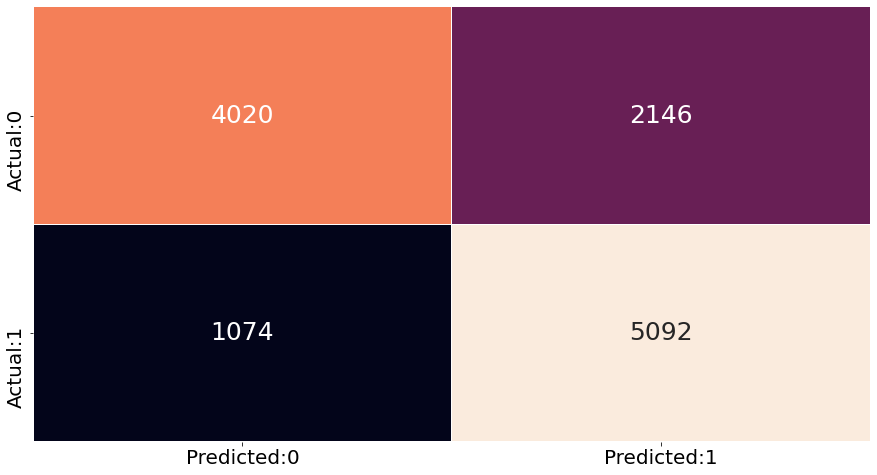

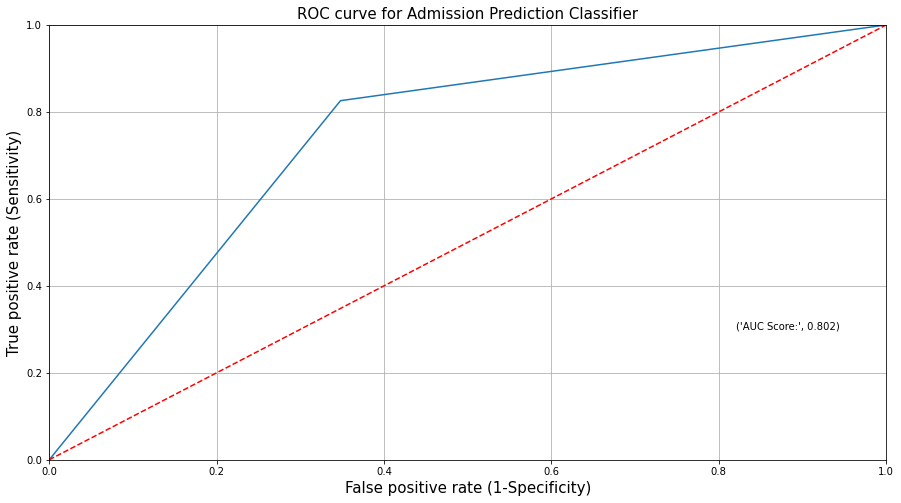

In [83]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=15,min_samples_split= 2 ,random_state=123)
model4 = dt.fit(xtrain,ytrain)
ypred = model4.predict(xtest)

name = 'Model 3 Tuned Decision Tree'
testreport4 = classification_report(ytest,ypred)
print(testreport4)
plot_confusion_matrix(model4)
plot_roc(model4)

In [84]:
## adding the required metrics of the model to the score card.



tta = accuracy_score(ytest,ypred)
ck =cohen_kappa_score(ytest,ypred)
f1 =f1_score(ytest,ypred)
s = pd.Series({'Model name': name,'Accuracy': np.round(tta,2),'F1-Score': np.round(f1,2),'Cohen-Kappa': np.round(ck,2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Model 1 Logistic Regression (scaled values),0.75,0.76,0.50
1,Model 2 Decision tree,0.72,0.72,0.43
2,Model 3 Tuned Decision Tree,0.74,0.76,0.48


### Model 4
#### Random Forest

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      6166
           1       0.77      0.86      0.81      6166

    accuracy                           0.80     12332
   macro avg       0.81      0.80      0.80     12332
weighted avg       0.81      0.80      0.80     12332



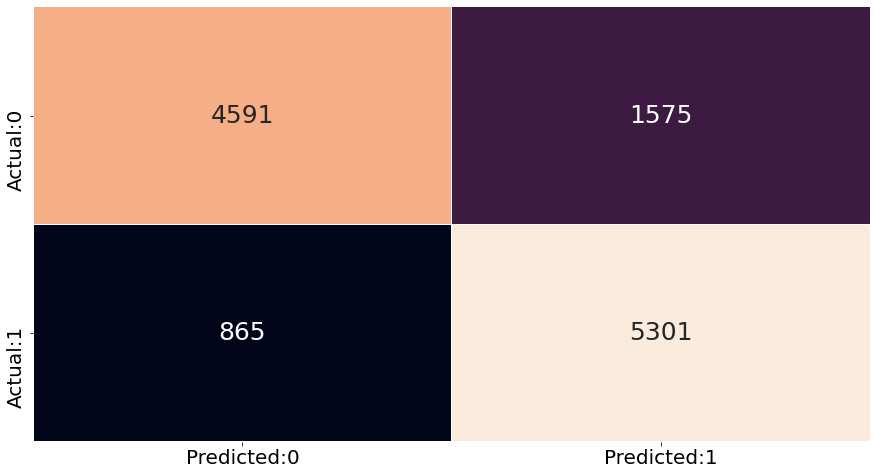

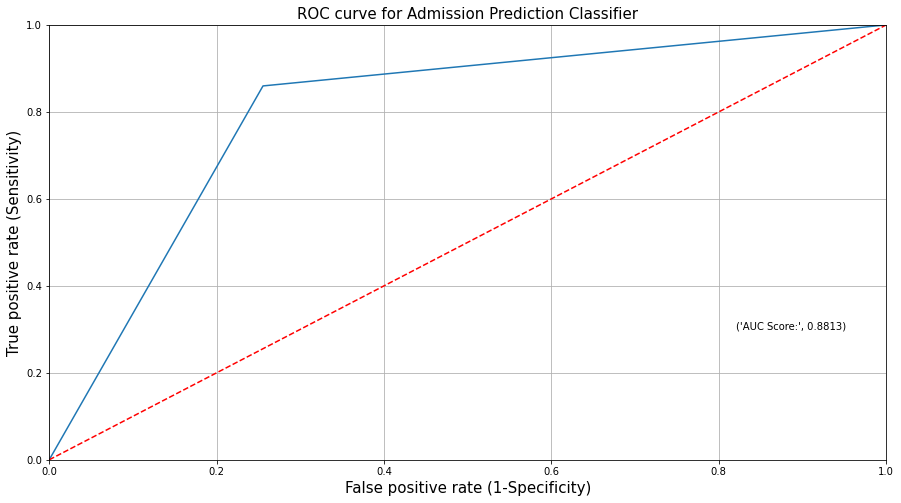

In [85]:
# random forest

rf = RandomForestClassifier(random_state=123)
model5 = rf.fit(xtrain,ytrain)
ypred = model5.predict(xtest)

name = 'Model 4 Random Forest'

testreport5 = classification_report(ytest,ypred)
print(testreport5)
plot_confusion_matrix(model5)
plot_roc(model5)

In [86]:
## adding the required metrics of the model to the score card.


tta = accuracy_score(ytest,ypred)
ck =cohen_kappa_score(ytest,ypred)
f1 =f1_score(ytest,ypred)
s = pd.Series({'Model name': name,'Accuracy': np.round(tta,2),'F1-Score': np.round(f1,2),'Cohen-Kappa': np.round(ck,2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Model 1 Logistic Regression (scaled values),0.75,0.76,0.50
1,Model 2 Decision tree,0.72,0.72,0.43
2,Model 3 Tuned Decision Tree,0.74,0.76,0.48
3,Model 4 Random Forest,0.80,0.81,0.60


### Model 5
#### Tuned Random Forest

In [619]:
#model 6
# tuned random forest. couldn't add more parameters due to computation issues witht he laptop

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [10,12,15],
                     'max_leaf_nodes': [10,12,15],
                    'min_samples_split':[2,3,4]}]

rf = RandomForestClassifier(random_state = 123)

grid_model_rf = GridSearchCV(estimator = rf , param_grid = tuned_paramaters,cv = 5)

model6 = grid_model_rf.fit(xtrain,ytrain)

print(' Best parameters: ',grid_model_rf.best_params_,'\n')

 Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_split': 2} 



              precision    recall  f1-score   support

           0       0.81      0.68      0.74      6166
           1       0.73      0.84      0.78      6166

    accuracy                           0.76     12332
   macro avg       0.77      0.76      0.76     12332
weighted avg       0.77      0.76      0.76     12332



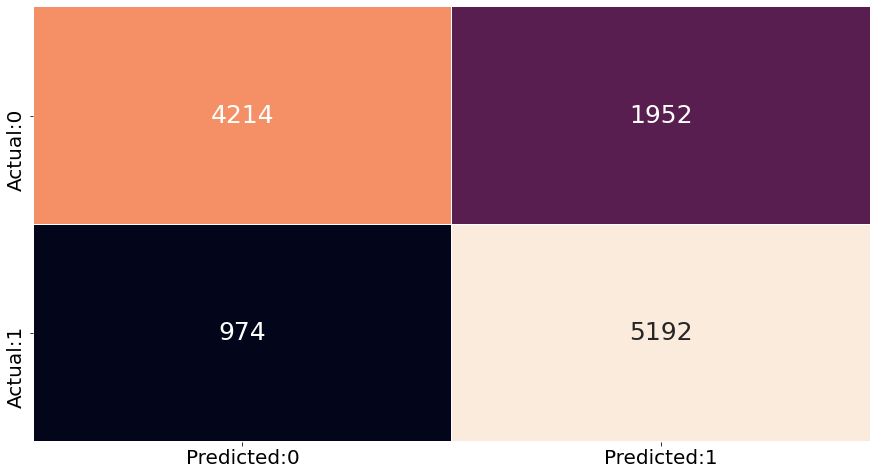

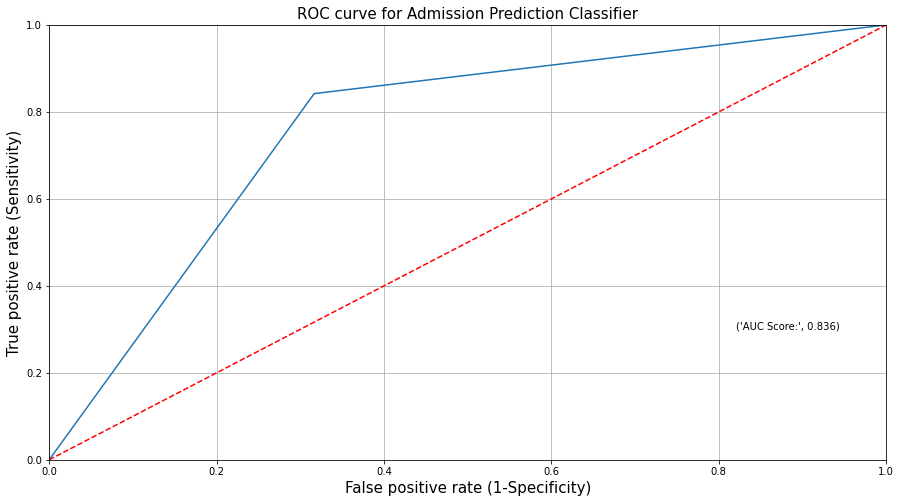

In [87]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 15, min_samples_split= 2,random_state=123)
model6 = rf.fit(xtrain,ytrain)
ypred = model6.predict(xtest)

name = 'Model 5 tuned Random Forest'

testreport6 = classification_report(ytest,ypred)
print(testreport6)
plot_confusion_matrix(model6)
plot_roc(model6)

In [88]:
## adding the required metrics of the model to the score card.


tta = accuracy_score(ytest,ypred)
ck =cohen_kappa_score(ytest,ypred)
f1 =f1_score(ytest,ypred)
s = pd.Series({'Model name': name,'Accuracy': np.round(tta,2),'F1-Score': np.round(f1,2),'Cohen-Kappa': np.round(ck,2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Model 1 Logistic Regression (scaled values),0.75,0.76,0.50
1,Model 2 Decision tree,0.72,0.72,0.43
2,Model 3 Tuned Decision Tree,0.74,0.76,0.48
3,Model 4 Random Forest,0.80,0.81,0.60
4,Model 5 tuned Random Forest,0.76,0.78,0.53


### Model 6
#### XGBoost

              precision    recall  f1-score   support

           0       0.84      0.75      0.80      6166
           1       0.78      0.86      0.82      6166

    accuracy                           0.81     12332
   macro avg       0.81      0.81      0.81     12332
weighted avg       0.81      0.81      0.81     12332



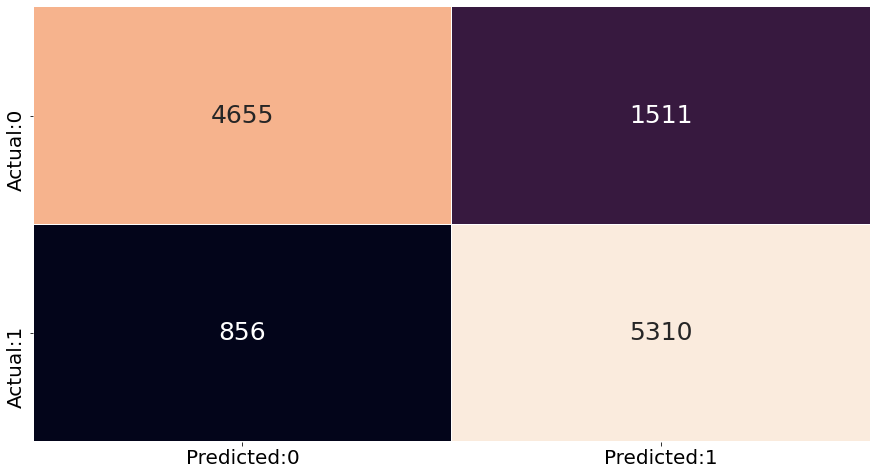

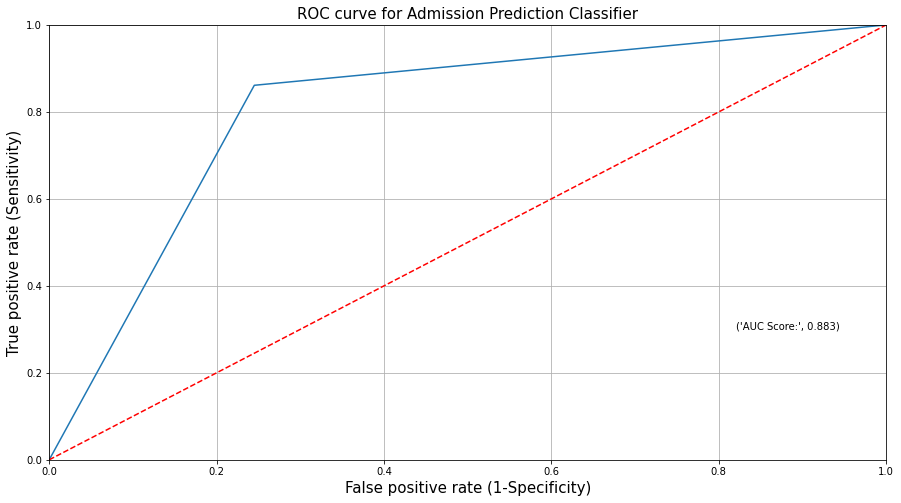

In [89]:
x = df_encoded_transformed.drop(['track','artist','uri','target'],axis=1)
y = df_encoded_transformed['target']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)

from xgboost import XGBClassifier

xgb_model = XGBClassifier()


model7 =  xgb_model.fit(xtrain, ytrain)

ypred = model7.predict(xtest)
ypredtrain = model7.predict(xtrain)
name = 'Model 6 XGBoost'




testreport7 = classification_report(ytest,ypred)

print(testreport7)
plot_confusion_matrix(model7)
plot_roc(model7)

In [90]:
## adding the required metrics of the model to the score card.



tta = accuracy_score(ytest,ypred)
ck =cohen_kappa_score(ytest,ypred)
f1 =f1_score(ytest,ypred)
s = pd.Series({'Model name': name,'Accuracy': np.round(tta,2),'F1-Score': np.round(f1,2),'Cohen-Kappa': np.round(ck,2)})
score_card = score_card.append(s,ignore_index=True)
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Model 1 Logistic Regression (scaled values),0.75,0.76,0.50
1,Model 2 Decision tree,0.72,0.72,0.43
2,Model 3 Tuned Decision Tree,0.74,0.76,0.48
3,Model 4 Random Forest,0.80,0.81,0.60
4,Model 5 tuned Random Forest,0.76,0.78,0.53
5,Model 6 XGBoost,0.81,0.82,0.62


In [56]:
#kfold - Random forest
from sklearn.model_selection import KFold,cross_val_score

cv = KFold(n_splits=10,random_state=123,shuffle=True)
scores = cross_val_score(model5,x,y,cv=cv,n_jobs=-1)

print(abs(scores))

[0.79956215 0.80345415 0.81731939 0.79007541 0.81585989 0.79153491
 0.80121655 0.81313869 0.81289538 0.8136253 ]


In [57]:
print('mean scores:',np.round(np.mean(abs(scores)),2))

mean scores: 0.81


In [58]:
#kfold - XGBoost
from sklearn.model_selection import KFold,cross_val_score

cv = KFold(n_splits=10,random_state=123,shuffle=True)
scores = cross_val_score(model7,x,y,cv=cv,n_jobs=-1)

print(abs(scores))

[0.80734614 0.81099489 0.81148139 0.79177816 0.81707614 0.7993189
 0.81289538 0.82311436 0.81873479 0.81654501]


In [59]:
print('mean scores:',np.round(np.mean(abs(scores)),2))

mean scores: 0.81


#### Creating a list of all classification reports

In [91]:
report_log = [testreport2,testreport3,testreport4,testreport5,testreport6,testreport7]
names = score_card['Model name']



In [92]:
score_card

,Model name,Accuracy,F1-Score,Cohen-Kappa
0,Model 1 Logistic Regression (scaled values),0.75,0.76,0.50
1,Model 2 Decision tree,0.72,0.72,0.43
2,Model 3 Tuned Decision Tree,0.74,0.76,0.48
3,Model 4 Random Forest,0.80,0.81,0.60
4,Model 5 tuned Random Forest,0.76,0.78,0.53
5,Model 6 XGBoost,0.81,0.82,0.62


### Modle name and classification reports

In [93]:


for i in range(len(report_log)):
    print(names[i],':\n')
    print(report_log[i],'\n\n')

Model 1 Logistic Regression (scaled values) :

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      6166
           1       0.72      0.82      0.76      6166

    accuracy                           0.75     12332
   macro avg       0.75      0.75      0.75     12332
weighted avg       0.75      0.75      0.75     12332
 


Model 2 Decision tree :

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6166
           1       0.72      0.72      0.72      6166

    accuracy                           0.72     12332
   macro avg       0.72      0.72      0.72     12332
weighted avg       0.72      0.72      0.72     12332
 


Model 3 Tuned Decision Tree :

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      6166
           1       0.70      0.83      0.76      6166

    accuracy                           0.74     12332
   macro avg       

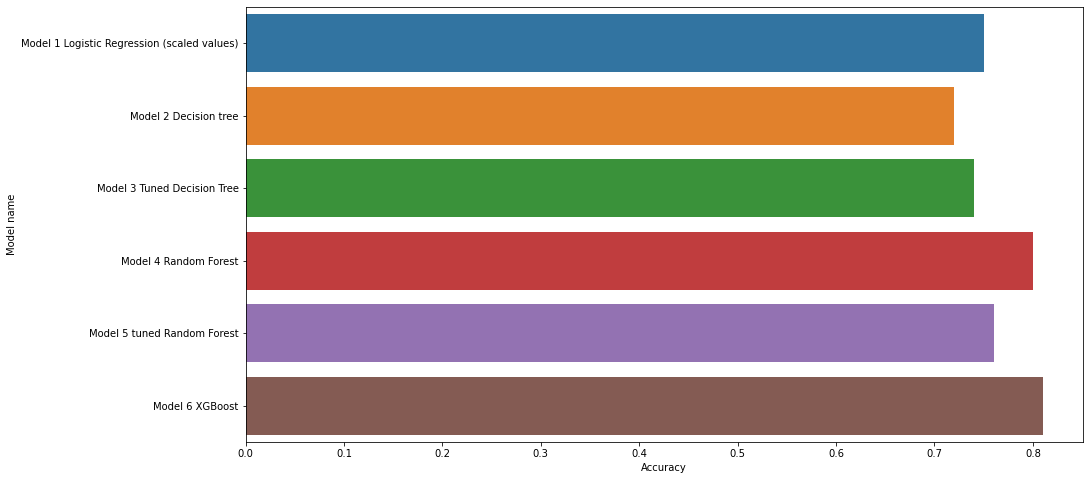

In [95]:
sns.barplot(score_card['Accuracy'],score_card['Model name'])
plt.show()
